In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data = pd.read_csv("/root/data/mnist_train_small.csv")
train_data=train_data.to_numpy()
x_train = train_data[:,1:]
y_train = train_data[:,0]

In [3]:
test_data = pd.read_csv("/root/data/mnist_test.csv")
test_data=test_data.to_numpy()
x_test = test_data[:,1:]
y_test = test_data[:,0]

7


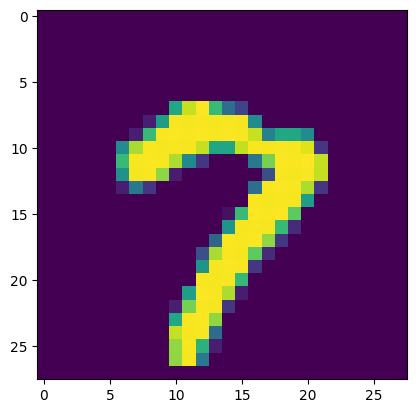

In [4]:
print(y_train[10])
plt.imshow(x_train[10].reshape((28,28)))

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

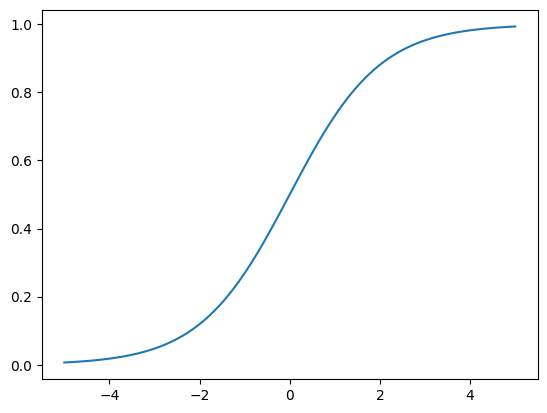

In [6]:
t = np.linspace(-5,5,100)
plt.plot(t,sigmoid(t))

In [7]:
def init_params(n_inp,n_hidden,n_out):
    W1 = np.random.random((n_inp,n_hidden)) / (n_hidden)
    b1 = np.random.random((n_hidden,))  / (n_hidden)
    W2 = np.random.random((n_hidden,n_out))  / (n_out)
    b2 = np.random.random((n_out,)) / (n_out)
    return (W1,b1,W2,b2)

def forward_and_backward(params,x,y,loss_fn,backward=True):
    W1,b1,W2,b2 = params
    # forward
    o1 = x @ W1 + b1
    o2 = sigmoid(o1)
    o3 = o2 @ W2 + b2
    o4 = sigmoid(o3)
    # backward
    if backward:
        loss,dLdo4 = loss_fn(o4,y)
        dLdo3 = dLdo4 * o4 * (1 - o4)
        dLdW2 = o2.T @ dLdo3
        dLdb2 = np.sum(dLdo3,axis=0)
        dLdo2 = dLdo3 @ W2.T
        dLdo1 = dLdo2 * o2 * (1 - o2)
        dLdW1 = x.T @ dLdo1
        dLdb1 = np.sum(dLdo1,axis=0)
        return o4, (dLdW1,dLdb1,dLdW2,dLdb2), loss
    return o4, None, None

def update_params(params,dparams,lr=0.1):
    new_params = []
    for p,dp in zip(params,dparams):
        new_params.append(p - lr*dp)
    return tuple(new_params)

In [8]:
def mse_loss(o,y,one_hot_encoding=True):
    if one_hot_encoding:
        y_ = np.zeros(o.shape)
        y_[np.arange(len(y)),y] = 1
    else:
        y_ = y
    dLdo = (o - y_) / (len(o[0]))
    loss = np.mean(dLdo ** 2 / 2)
    return loss, dLdo

In [9]:
params = init_params(28*28,256,10)

In [10]:
N = len(x_train)
epochs = 5
batch_size = 64
for epoch in range(epochs):
    tot_loss = 0
    for i in range(N // batch_size + 1):
        x_ = x_train[i*batch_size:(i+1)*batch_size] / 255
        y_ = y_train[i*batch_size:(i+1)*batch_size]
        o,dparams,loss = forward_and_backward(params,x_,y_,mse_loss)
        tot_loss += loss
        params = update_params(params,dparams,lr=0.1)
    print(tot_loss)

0.22864633047561064
0.06828661867252174
0.04599649732040538
0.03757210087889321
0.03337155587819137


In [11]:
o,_,_ = forward_and_backward(params,x_test[:10]/ (255),None,None,backward=False)

In [12]:
np.argmax(o,axis=1)

array([2, 1, 0, 4, 1, 4, 9, 6, 9, 0])

In [13]:
y_test[:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9, 0])